# Lab02: Working with Time Series


## 1. Thu thập dữ liệu

- Ngữ cảnh để nhóm chúng em tìm kiếm dữ liệu này:
- Chủ đề dữ liệu:
- Nguồn dữ liệu:
- License của dữ liệu:
- Phương pháp để thu thập dữ liệu này:


## 2. Tiền xử lý dữ liệu

#### Import thư viện

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

#### Đọc dữ liệu từ file CSV

In [8]:
df = pd.read_csv("./../datasets/weekly_fuel_prices_all_data_from_2005_to_20221102.csv",sep=";")

#### In 5 dòng dữ liệu đầu tiên

In [9]:
df.head()

,SURVEY_DATE,PRODUCT_ID,PRODUCT_NAME,PRICE,VAT,EXCISE,NET,CHANGE
0,2005-01-03,1,Euro-Super 95,1115.75,185.96,558.64,371.15,-1.57
1,2005-01-03,2,Automotive gas oil,1018.28,169.71,403.21,445.36,-0.33
2,2005-01-03,3,Heating gas oil,948.50,158.08,403.21,387.21,-22.55
3,2005-01-03,5,LPG,552.50,92.08,156.62,303.80,0.22
4,2005-01-03,6,Residual fuel oil,553.25,50.30,166.84,336.11,-12.21


#### Thông tin số dòng và số cột

In [10]:
df.shape

(5358, 8)

 -> Bộ dữ liệu có 5358 dòng và 8 cột

### 2.1. Mỗi dòng có ý nghĩa gì? ? Có vấn đề các dòng có ý nghĩa khác nhau không?

Mỗi dòng dữ liệu cho biết thông tin xăng dầu theo ngày của mỗi loại xăng ở Ý, cụ thể: giá xăng, vat,...

Tất cả các dòng dữ liệu có ý nghĩa hoàn toàn giống nhau và không có ngoại lệ. 

### 2.2. Mỗi cột có ý nghĩa gì?


In [11]:
df.columns

Index(['SURVEY_DATE', 'PRODUCT_ID', 'PRODUCT_NAME', 'PRICE', 'VAT', 'EXCISE',
       'NET', 'CHANGE'],
      dtype='object')

- Cột `SURVEY_DATE` là ngày thực hiện khảo sát
- Cột `PRODUCT_ID` là mã số của từng loại xăng dầu 
- Cột `PRODUCT_NAME` là tên của loại xăng dầu
- Cột `PRICE` là giá xăng dầu
- Cột `VAT` là thuế giá trị gia tăng VAT
- Cột `EXCISE`là thuế tiêu thụ đặc biệt Excise
- Cột `NET` là giá trị thực tế của xáng dầu sau khi loại bỏ các khoản thuế.
- Cột `CHANGE` là khoảng thay đổi của giá xăng dầu

### 2.3. Mỗi cột hiện đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lý tiếp hay không?

In [12]:
df.dtypes

SURVEY_DATE      object
PRODUCT_ID        int64
PRODUCT_NAME     object
PRICE           float64
VAT             float64
EXCISE          float64
NET             float64
CHANGE          float64
dtype: object

- Dữ liệu ở các cột `SURVEY_DATE`, `PRODUCT_NAME` thuộc kiểu non-numeric
- Dữ liệu ở các cột `PRODUCT_ID` thuộc kiểu số nguyên
- Dữ liệu ở các cột `PRICE`, `VAT`, `EXCISE`, `NET`, `CHANGE` thuộc kiểu số thực

### 2.4. Với mỗi cột, các giá trị (dạng số, dạng phân loại) được phân bố như thế nào?

### 2.5. Có cần phải tiền xử lý dữ liệu hay không và nếu có thì nhóm sinh viên cần phải xử lý như thế nào?

## 3. Khám phá mối quan hệ trong dữ liệu

Chúng ta sẽ khám phá các mối quan hệ trong dữ liệu bằng cách đưa ra những câu hỏi và trả lời.

### 3.1. Đặt câu hỏi

**1. Câu hỏi 1:**

**2. Câu hỏi 2:**

**3. Câu hỏi 3:**

**4. Câu hỏi 4:**

**5. Câu hỏi 5:**

**6. Câu hỏi 6:**

**7. Câu hỏi 7:**

**8. Câu hỏi 8:**


### Câu hỏi 1: Sự thay đổi giá nhiên liệu theo thời gian?

#### Để trả lời câu hỏi này, chúng ta có thể sử dụng biểu đồ đường (line chart) để minh họa sự thay đổi giá nhiên liệu theo thời gian. Chúng ta sẽ xếp thời gian trên trục x và giá nhiên liệu trên trục y. Với biểu đồ này, ta có thể quan sát được xu hướng tăng hoặc giảm của giá nhiên liệu qua các thời điểm khác nhau. Đây là một biểu đồ rất hữu ích để đánh giá sự thay đổi của giá nhiên liệu theo thời gian.

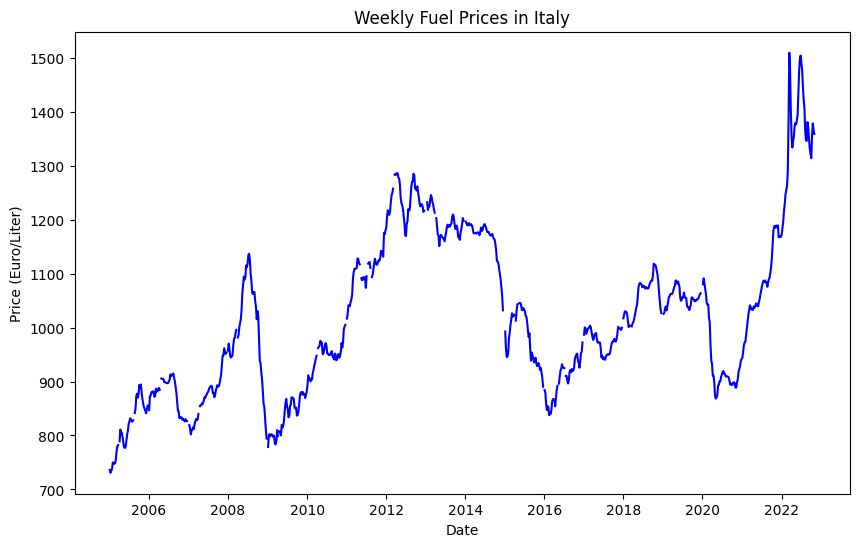

In [16]:
df['SURVEY_DATE'] = pd.to_datetime(df['SURVEY_DATE'])

# Group data by date and find the average price for each week
weekly_prices = df.groupby(pd.Grouper(key='SURVEY_DATE', freq='W-MON'))[['PRICE']].mean()

# Plot the line chart
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(weekly_prices.index, weekly_prices['PRICE'], color='blue')
ax.set_title('Weekly Fuel Prices in Italy')
ax.set_xlabel('Date')
ax.set_ylabel('Price (Euro/Liter)')
plt.show()

#### Biểu đồ đường sẽ giúp chúng ta dễ dàng nhận ra xu hướng tăng giảm giá nhiên liệu qua các thời điểm khác nhau.

### Câu hỏi 2:  Phân phối giá nhiên liệu theo loại sản phẩm?

### - Để trả lời câu hỏi này, chúng ta có thể sử dụng biểu đồ violin (violin plot) để so sánh phân phối giá nhiên liệu giữa các loại sản phẩm khác nhau. Biểu đồ violin sẽ cho chúng ta thấy phân phối của dữ liệu ở mỗi loại sản phẩm dưới dạng một cái đàn violin.

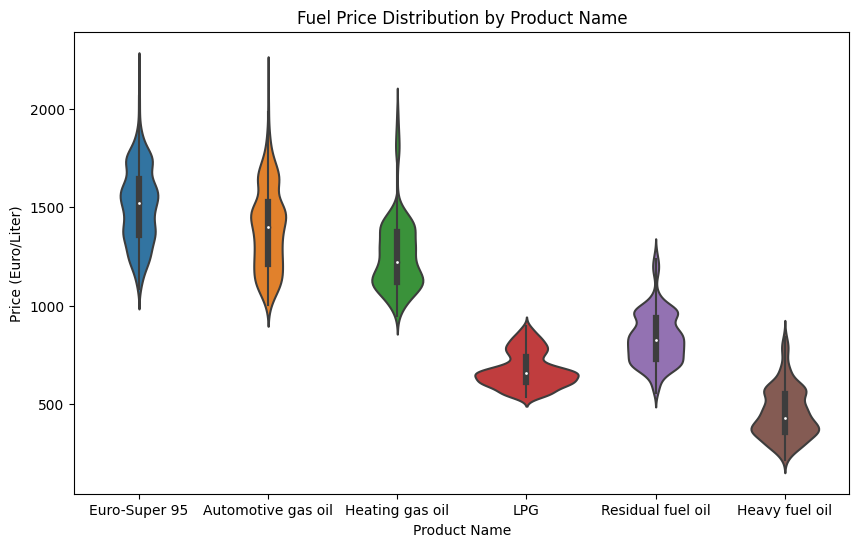

In [17]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.violinplot(x='PRODUCT_NAME', y='PRICE', data=df, ax=ax)
ax.set_title('Fuel Price Distribution by Product Name')
ax.set_xlabel('Product Name')
ax.set_ylabel('Price (Euro/Liter)')
plt.show()

### Câu hỏi 3: Biểu đồ tần suất giá nhiên liệu của từng loại sản phẩm

### - Với biểu đồ này, ta có thể thấy được phân bố giá của từng loại sản phẩm. Điều này sẽ giúp cho người quản lý hoặc người tiêu dùng có cái nhìn tổng quan về giá của từng loại nhiên liệu.

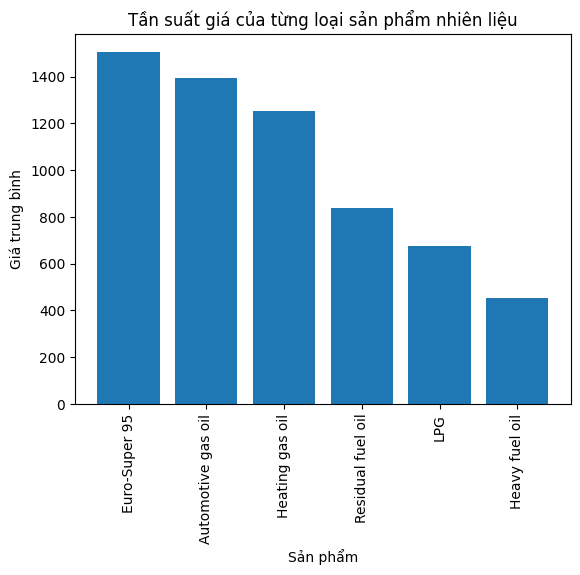

In [18]:
products = {}
for product in df['PRODUCT_NAME'].unique():
    product_df = df[df['PRODUCT_NAME'] == product]
    avg_price = product_df['PRICE'].mean()
    products[product] = avg_price

# Sắp xếp các sản phẩm theo thứ tự giảm dần của giá
sorted_products = sorted(products.items(), key=lambda x: x[1], reverse=True)

# Tạo một list chứa các sản phẩm và giá trung bình của chúng
labels = []
prices = []
for product, price in sorted_products:
    labels.append(product)
    prices.append(price)

# Vẽ biểu đồ tần suất giá của từng loại sản phẩm
plt.bar(labels, prices)
plt.xticks(rotation=90)
plt.xlabel('Sản phẩm')
plt.ylabel('Giá trung bình')
plt.title('Tần suất giá của từng loại sản phẩm nhiên liệu')
plt.show()

#### Với biểu đồ này, ta có thể thấy rõ phân bố giá của từng loại sản phẩm, giúp cho người quản lý hoặc người tiêu dùng có cái nhìn tổng quan về giá của từng loại nhiên liệu.

#### Câu hỏi 4: Sự tương quan giữa giá nhiên liệu và tỷ lệ VAT/Excise.

#### - Heatmap được sử dụng để hiển thị sự tương quan giữa các biến. Trong ví dụ này, chúng ta sử dụng heatmap để hiển thị sự tương quan giữa giá nhiên liệu, VAT và Excise. Biểu đồ này giúp chúng ta nhận ra mức độ tương quan giữa các biến và có thể giúp chúng ta chọn ra các biến quan trọng để xây dựng mô hình dự đoán cho giá nhiên liệu.

In [21]:
sns.heatmap(df[["PRICE", "VAT", "EXCISE"]].corr(), annot=True)
plt.title("Correlation between Price, VAT, and Excise")
plt.show()


NameError: name 'fuel_prices' is not defined

### 3.2. Trả lời câu hỏi

#### **Câu hỏi 1:** lorem ipsum dolor sir almet...

#### **Câu hỏi 2:** lorem ipsum dolor sir almet...

#### **Câu hỏi 3:** lorem ipsum dolor sir almet...